## LDA
- 数据集

$$sklearn.datasets.make\_blobs$$

- 输出

$$X=[x_1,x_2,...,x_n]^T \in \mathbb{R}^{n*p}$$
$$Y=HXG \in \mathbb{R}^{n*q} (q<p)$$

$$\max_Gtr((G^TS_{wx}G)^{-1}(G^TS_{bx}G))$$

$$S_{bx}g_i=\lambda_iS_{wx}g_i$$
$$S_{bx}g_i=\frac{\lambda_i}{1+\lambda_i}S_{tx}g_i$$
$$S_t^\dagger S_{bx}g=\lambda g$$

In [1]:
import math
import warnings
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.datasets import make_blobs
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

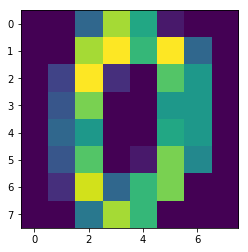

In [2]:
X,Y=load_digits(return_X_y=True)
plt.imshow(X[0].reshape(8,8))

In [3]:
class LDA():
    def __init__(self,q,n_sample):
        self.q=q
        self.one=np.ones(n_sample).reshape(-1,1)
        self.H=np.diag(np.ones(n_sample))-1/n_sample*np.dot(self.one,self.one.T)
        
    def fit_transform(self,X,Y):
        S_t=np.dot(np.dot(X.T,self.H),X)
        y=set(Y)
        M=(reduce(lambda x,y:x+y,X)/X.shape[0]).reshape(-1,1)
        S_b=np.zeros((X.shape[1],X.shape[1]))
        for u in y:
            n=sum(Y==u)
            m=reduce(lambda x,y:x+y,X[Y==u]).reshape(-1,1)
            S_b=S_b+n*np.dot((m-M),(m-M).T)
        S_w=S_t-S_b
        eig_val,eig_vec=LA.eig(np.dot(LA.pinv(S_t),S_b))
        u=np.argsort(eig_val)[::-1]
        eig_val=eig_val[u]
        eig_vec=eig_vec[:,u]
        return np.dot(np.dot(self.H,X),eig_vec[:,:self.q])

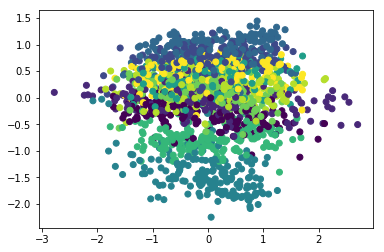

In [4]:
q,n_sample=2,X.shape[0]
pre=LDA(q,n_sample)
y=pre.fit_transform(X,Y)
plt.scatter(y[:,0],y[:,1],c=Y)